In [100]:
import pandas as pd
import seaborn as sns
import numpy as np

from importlib import reload
import utils
reload(utils)

<module 'utils' from 'c:\\Users\\novik\\OneDrive\\Documents\\Kaggle\\Kaggle projects\\ICR\\icr\\src\\utils.py'>

In [101]:
greeks = pd.read_csv("..//data//greeks.csv")
df_train = pd.read_csv("..//data//train.csv",index_col=False)
df_test = pd.read_csv("..//data//test.csv",index_col=False)
df_train = df_train.drop("Unnamed: 0", axis=1)
df_test = df_test.drop("Unnamed: 0", axis=1)
greeks = greeks.drop("Unnamed: 0", axis=1)

In [77]:
utils.summary(df_test)

Shape: (5, 57)
# numeric: 55
# object: 2
Numeric summary:         AB   AF   AH   AM   AR   AX   AY   AZ   BC  BD   ...   FI   FL   FR   
count  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...  5.0  5.0  5.0  \
mean   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
std    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
min    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
25%    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
50%    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
75%    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
max    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        FS   GB   GE   GF   GH   GI   GL  
count  5.0  5.0  5.0  5.0  5.0  5.0  5.0  
mean   0.0  0.0  0.0  0.0  0.0  0.0  0.0  
std    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
min    0.0  0.0  0.0  0.0  0.0  0.0  0.0  
25%    0.0  0.0

In [30]:
dv = "Class"
ids = ['Id']
cat = ['EJ']
num = [i for i in df_train.columns if i not in ids+cat+[dv]]
num[:5]

print(df_train.Id.nunique())

617


# EDA

BQ    0.097245
CB    0.003241
CC    0.004862
DU    0.001621
EL    0.097245
FC    0.001621
FL    0.001621
FS    0.003241
GL    0.001621
dtype: float64


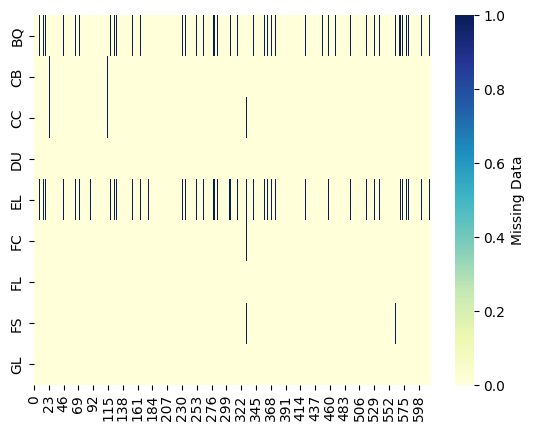

In [32]:
# Check missing volumes
utils.missings(df_train)

In [ ]:
for var in ['BQ','EL']
    df_train[var] = df_train[var].fillna('MISSING')
    df_test[var] = df_test[var].fillna('MISSING')

In [60]:
for n in num:
    utils.plot_num(df_train,var1=n,var2=dv,huevar='EJ')

# Clean data

In [96]:
miss_var = []
miss_high = ['BQ','EL']
print(df_train.shape)
df_fix = df_train.copy()
# Create missing values indicator
for n in miss_high:
    df_fix = utils.miss_ind(df_fix,n,val=np.nan,th=0)
    miss_var.append(n)
print(df_fix.shape)

miss_low = ['CB','CC','FC','FL','FS','GL','DU']
# Replace extreme & missing values
miss_val = {}
for n in miss_low + miss_high:
    #th = utils.find_outliers_IQR(df_fix,n,3) #1.5
    th = [np.nan]
    miss_val[n] = df_fix[n].median()
    df_fix = utils.xtrm_val(df_fix,n,th,replace='median')

# reset arrays
cat = [c for c in cat if df_fix.columns.isin([c]).max()]

# Use OH encoding
print(df_fix.shape)
encoder = {}
for var in cat:
    ref = df_fix[var].unique()[-1]
    df_fix, e = utils.encode(df_fix,var,drop=0,type="onehot",ref=ref,pref=var,dv=dv,nc=8)
    encoder[var] = e
print(df_fix.shape)

# reset categorical list
cat_n = [i for i in df_fix.columns if i not in ids+num+[dv]]
num = [n for n in num if df_fix.columns.isin([n]).max()]

(617, 58)
(617, 60)
(617, 60)
(617, 60)


## Transform test

In [105]:
cat_n

['BQ_ind', 'EL_ind', 'EJ_B']

In [97]:
# Create missing values indicator
print(df_test.shape)
for n in miss_var:
    df_test = utils.miss_ind(df_test,n,val=np.nan,th=-1)
print(df_test.shape)

# Replace missings
for k, v in miss_val.items():
    df_test = utils.xtrm_val(df_test,k,[np.nan],replace=v)
    
# Use OH encoding
print(df_test.shape)
for var in cat:
    ref = encoder[var][0]
    df_test, _ = utils.encode(df_test,var,drop=0,type="onehot",ref=ref,pref=var,dv=dv,nc=8)
# set missisng categories to 0
for c in cat_n:
    if c not in df_test.columns:
        df_test[c] = 0
print(df_test.shape)
df_test = df_test[num+cat_n]
print(df_test.shape)

(5, 57)
(5, 59)
(5, 59)
(5, 59)
(5, 58)


## Save ds

In [98]:
keep_cols = [i for i in df_fix.columns if np.any(df_test.columns==i)]
df_fix = df_fix[keep_cols+[dv]]

In [99]:
df_fix.to_csv("..\\data\\train_fix.csv")
df_test.to_csv("..\\data\\test_fix.csv")

import pickle 
with open('..\\data\\encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('..\\data\\miss_var.pkl', 'wb') as f:
    pickle.dump(miss_var, f)
with open('..\\data\\miss_val.pkl', 'wb') as f:
    pickle.dump(miss_val, f)
